# Part 1 (Data)

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets

In [10]:
f = open("coins.csv", 'r')
c = [i for i in f.readline().split(',')]
c[-1] = c[-1][:-1]
dataset = [c]
k = 0
while c != [None]:
    k += 1
    c = [i if i != '' else None for i in f.readline().split(',')]
    if c[-1] is not None :
        c[-1] = c[-1][:-1]
    dataset.append(c)
coins = pd.DataFrame(data=dataset[1:], columns=dataset[0], index=pd.DatetimeIndex([p[0] for p in dataset[1:]]))

In [11]:
coins.head(4)


,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
2013-04-28,2013-04-28,135.3,41702.0,68798683.4463,117984.0,BTC,Bitcoin,135.3,135.98,132.1,134.21,0.0,1500520000.0
2013-04-28,2013-04-28,4.3,9174.0,44319520.0666,17216.0,LTC,Litecoin,4.3,4.4,4.18,4.35,0.0,73773400.0
2013-04-29,2013-04-29,134.44,51602.0,113812845.38,86925.0,BTC,Bitcoin,134.44,147.49,134.0,144.54,0.0,1491160000.0
2013-04-29,2013-04-29,4.37,9275.0,36478096.6026,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,74952700.0


In [12]:
coins['name'].nunique()


70

In [13]:
print("From: ", coins['date'].dropna().min())
print("To: ", coins['date'].dropna().max())

From:  2013-04-28
To:  2018-06-06


In [14]:
print(pd.isnull(coins).sum())

date                  1
price               328
txCount            1521
txVolume           1831
activeAddresses    1521
symbol                1
name                  1
open                  1
high                  1
low                   1
close                 1
volume                1
market                1
dtype: int64


In [15]:
print("Who:", coins.sort_values(by=['price'])['name'][0], "\t When:", 
      coins.sort_values(by=['price'])['date'][0], sep=' ')


Who: NEM 	 When: 2015-11-25


Введите размер: 
30 30


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a51ac2880>],
      dtype=object)

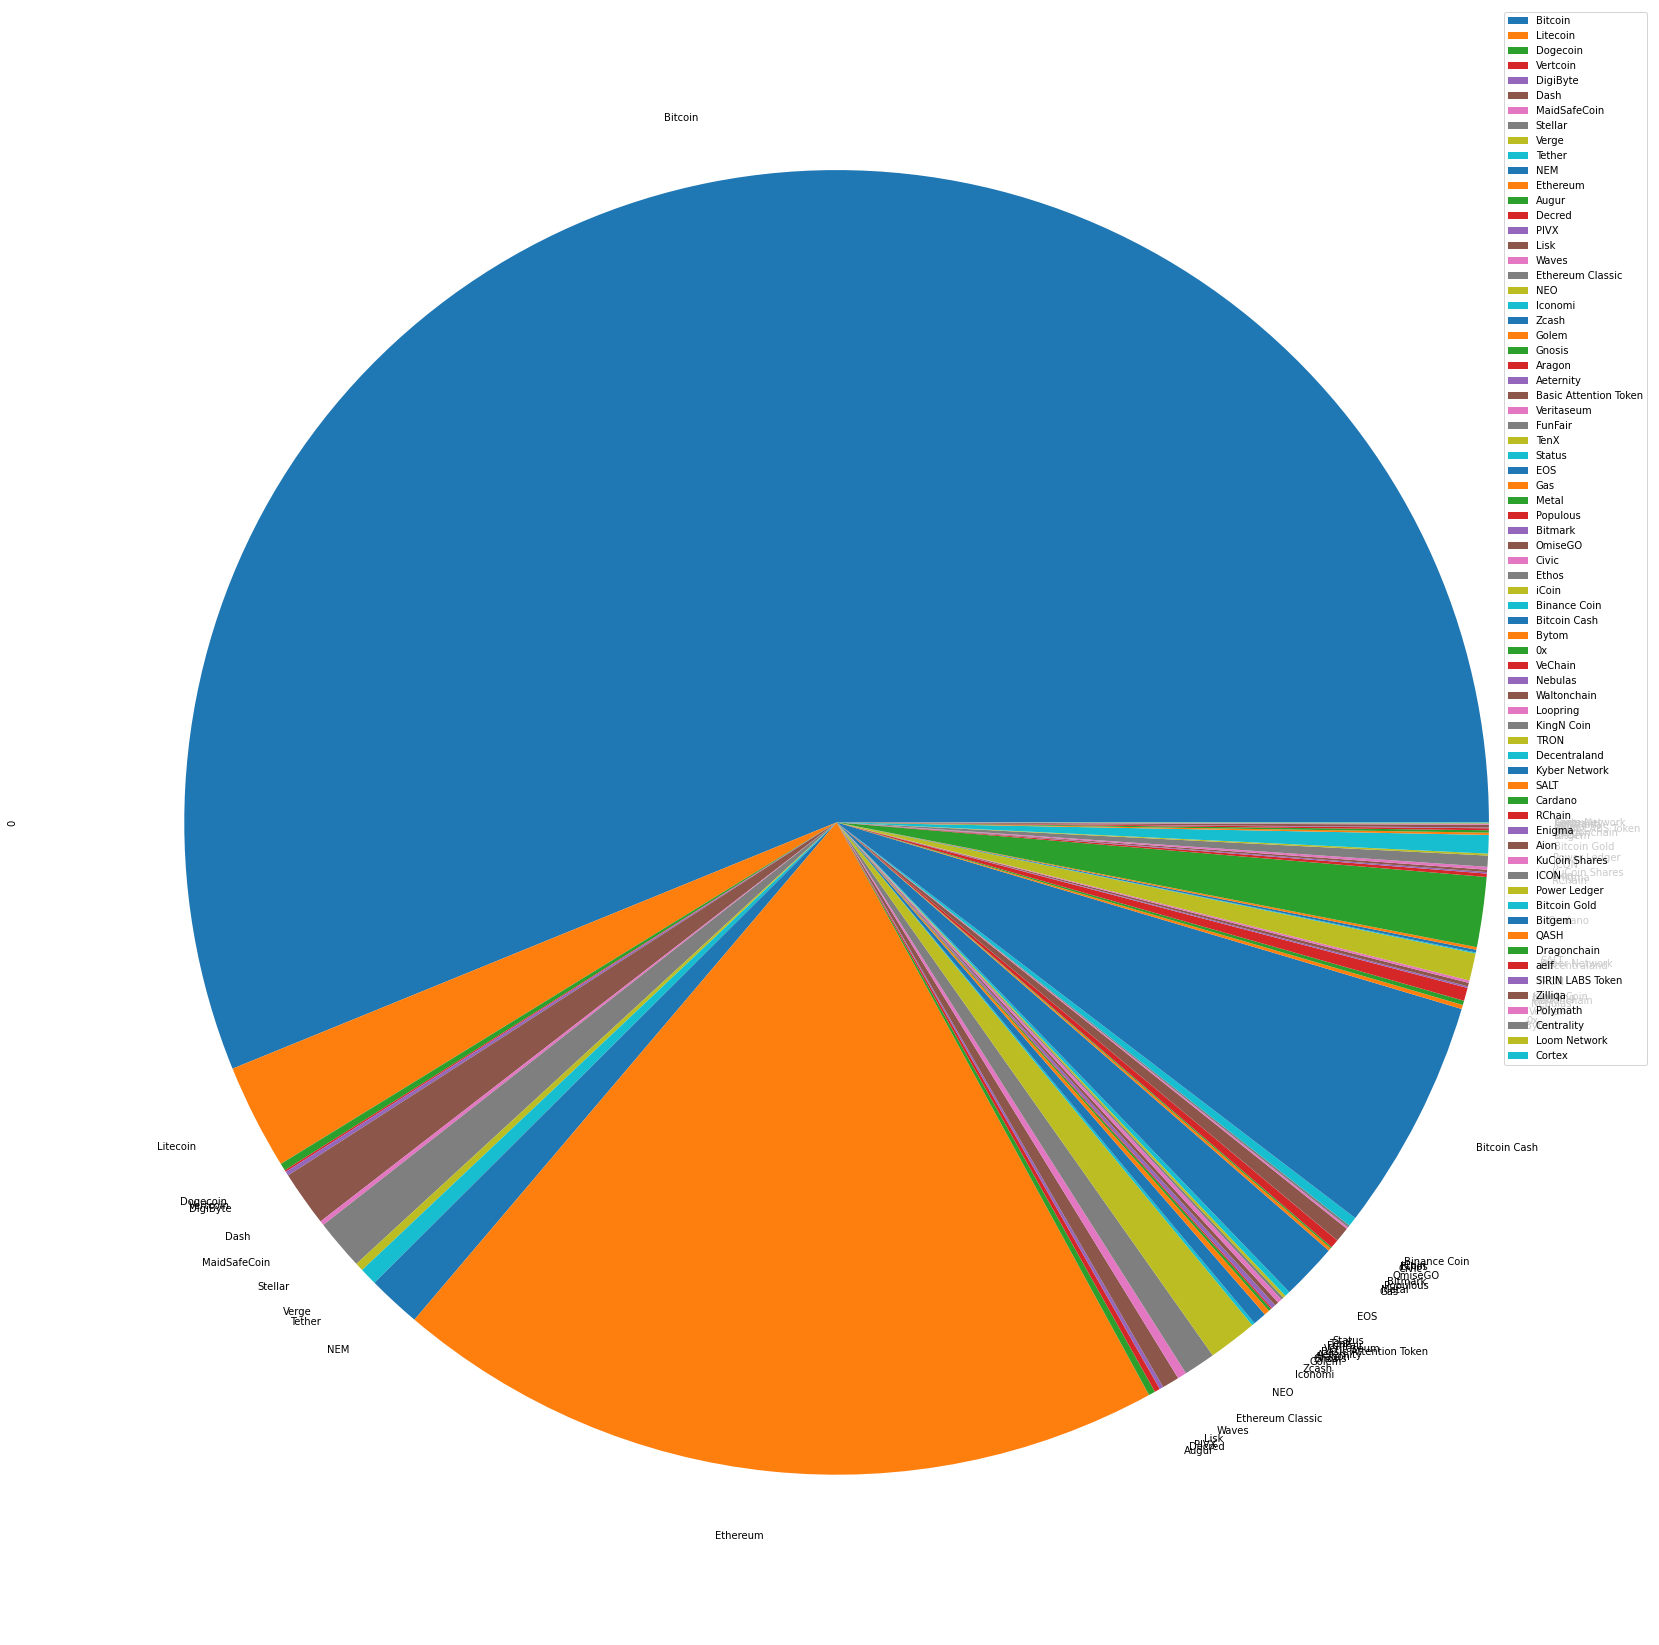

In [16]:
%matplotlib inline
print('Введите размер: ')
w, l = [int(i) for i in input().split()]
data = dict()
for index, row in coins.iterrows():
    if row['market'] is not None:
        try:
            data[row['name']] += float(row['market'])
        except KeyError:
            data[row['name']] = float(row['market'])
market = pd.DataFrame(data=data.values(), index=data.keys())
market.plot.pie(subplots=True, figsize=(w,l))

# Part 2 (Visualization)

In [17]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = dict()
    for index, row in coins.iterrows():
        if row['symbol'] == symbol:
            if start_date <= row['date'] <= end_date:
                try:
                    data[row['date']] += float(row['price'])
                except KeyError:
                    data[row['date']] = float(row['price'])
    rate = pd.DataFrame(data=data.values(), columns=[symbol],index=data.keys())
    rate.plot(figsize=(20,10))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

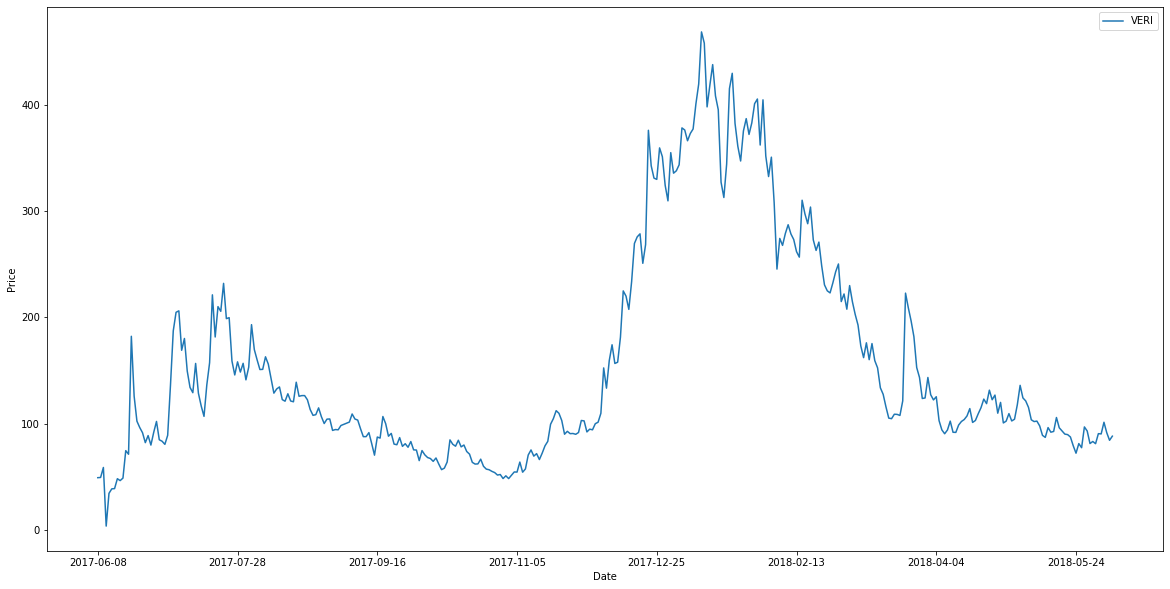

364


In [76]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

# Part 3 (Pump'n'Dump)

In [18]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    pnd = 0
    price = dict()
    day = ''
    for index, row in coins.iterrows():
        if row['symbol'] == symbol:
            if row['date'] is not None:
                if start_date <= row['date'] <= end_date:
                    try:
                        price[row['date']] = max(price[row['date']], max(float(row['close']), float(row['open'])))
                    except KeyError:
                        price[row['date']] = max(float(row['close']), float(row['open']))
    for index, row in coins.iterrows():
        if row['symbol'] == symbol:
            if row['date'] is not None:
                if start_date <= row['date'] <= end_date:
                    if pnd < float(row['high']) / price[row['date']]:
                        pnd = float(row['high']) / price[row['date']]
                        day = row['date']
    return day, pnd

In [19]:
a, b = find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')
print("When: ", a, "\t Max PnD: ", b)

When:  2017-11-29 	 Max PnD:  1.1428940004366206


In [20]:
for symb in set(coins['symbol']):
    if symb is not None:
        a, b = find_most_severe_pump_and_dump(coins, symbol=symb, start_date='2013-04-28', end_date='2018-06-06')
        print("Who: ", symb, "\t When: ", a, "\t Max PnD: ", b)


Who:  ICX 	 When:  2017-12-16 	 Max PnD:  1.2538461538461536
Who:  NEO 	 When:  2016-10-25 	 Max PnD:  2.3759063310539967
Who:  ZEC 	 When:  2017-03-18 	 Max PnD:  1.4192894982860704
Who:  REP 	 When:  2018-05-11 	 Max PnD:  1.477601285025879
Who:  GNT 	 When:  2018-04-13 	 Max PnD:  1.6882121234525305
Who:  VERI 	 When:  2017-06-11 	 Max PnD:  33.549253731343285
Who:  POLY 	 When:  2018-02-02 	 Max PnD:  1.4553773349994372
Who:  CTXC 	 When:  2018-04-24 	 Max PnD:  1.1428571428571428
Who:  MTL 	 When:  2017-11-20 	 Max PnD:  1.6728538283062646
Who:  AE 	 When:  2017-08-06 	 Max PnD:  1.7482936279178192
Who:  ETH 	 When:  2015-08-07 	 Max PnD:  1.2508833922261484
Who:  OMG 	 When:  2017-07-14 	 Max PnD:  1.3312148056585635
Who:  QASH 	 When:  2017-11-23 	 Max PnD:  1.6658378856041132
Who:  ELF 	 When:  2018-01-05 	 Max PnD:  1.2808988764044942
Who:  BTM 	 When:  2018-03-13 	 Max PnD:  7.177933491925104
Who:  POWR 	 When:  2017-11-02 	 Max PnD:  1.3641688298886077
Who:  LRC 	 When:  201

# Part 4 (Payback)

In [21]:
def compute_roi(coins, investments, start_date, end_date):
    value = dict()
    start = 0
    end = 0
    for index, row in coins.iterrows():
        if start_date is not None and start_date == row['date']:
            if row['symbol'] in investments.keys():
                start += investments[row['symbol']]
                value[row['symbol']] = investments[row['symbol']] / float(row['price'])
    for index, row in coins.iterrows():
        if end_date is not None and end_date == row['date']:
            if row['symbol'] in investments.keys():
                end += value[row['symbol']] * float(row['price'])
    return (end - start) / start

In [101]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [22]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')


51.28330296529592